# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url= "http://api.openweathermap.org/data/2.5/weather?"
url= f"{base_url}appid={weather_api_key}&units=imperial&q="

print(f"Beginning Data Retrieval")
print(f"---------------------------")

set_counter=1
city_counter=1
humidity=[]
city_name=[]
lat=[]
lng=[]
max_temp = []
cloudiness = []
wind_speed = []
country= []
date=[]

for city in cities:
    response_json = requests.get(url + city).json()
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    city_counter+=1
    
    if city_counter >= 51:
            time.sleep(1)
            city_counter=1
            set_counter+=1
    try: 
        humidity.append(response_json["main"]["humidity"])
        city_name.append(response_json["name"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        max_temp.append(response_json["main"]["temp_max"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        
    except:
        print("City not found. Skipping...")
        pass
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

        
    


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | sao benedito do rio preto
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | labuhan
Processing Record 4 of Set 1 | pimentel
Processing Record 5 of Set 1 | uinskoye
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | freeport
Processing Record 8 of Set 1 | sarangani
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | sivaki
Processing Record 14 of Set 1 | cattolica
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | walvis bay
Processing Recor

Processing Record 38 of Set 4 | angoram
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | chaiya
Processing Record 41 of Set 4 | avera
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | chimbote
Processing Record 44 of Set 4 | hambantota
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | lamar
Processing Record 48 of Set 4 | inirida
Processing Record 49 of Set 4 | tena
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | sataua
City not found. Skipping...
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | moissala
Processing Record 4 of Set 5 | irondequoit
Processing Record 5 of Set 5 | pontes e lacerda
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | pingzhuang
Processing Record 9 of Set 5 | west wendover
Processing Record 10 of Set 5 | sao gabriel da cachoeira
Processing R

Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | mandalgovi
Processing Record 29 of Set 8 | dickinson
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | abbeyleix
Processing Record 32 of Set 8 | sorvag
City not found. Skipping...
Processing Record 33 of Set 8 | airai
Processing Record 34 of Set 8 | heinola
Processing Record 35 of Set 8 | viligili
City not found. Skipping...
Processing Record 36 of Set 8 | mouila
Processing Record 37 of Set 8 | kimamba
Processing Record 38 of Set 8 | rio claro
Processing Record 39 of Set 8 | whitefish
Processing Record 40 of Set 8 | zemio
Processing Record 41 of Set 8 | pevek
Processing Record 42 of Set 8 | magadan
Processing Record 43 of Set 8 | san miguel
Processing Record 44 of Set 8 | warqla
City not found. Skipping...
Processing Record 45 of Set 8 | alanya
Processing Record 46 of Set 8 | andapa
Processing Record 47 of Set 8 | erenhot
Processing Record 48 of Set 8 | zyryanka
Processing Record 49 of S

Processing Record 13 of Set 12 | sena madureira
Processing Record 14 of Set 12 | axim
Processing Record 15 of Set 12 | popondetta
Processing Record 16 of Set 12 | arcachon
Processing Record 17 of Set 12 | chibombo
Processing Record 18 of Set 12 | kirakira
Processing Record 19 of Set 12 | santa vitoria do palmar
Processing Record 20 of Set 12 | samarai
Processing Record 21 of Set 12 | borovskoy
Processing Record 22 of Set 12 | tiarei
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | paszto
Processing Record 25 of Set 12 | soma
Processing Record 26 of Set 12 | san vicente
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | havelock
Processing Record 29 of Set 12 | tarragona
Processing Record 30 of Set 12 | peterhead
Processing Record 31 of Set 12 | shellbrook
Processing Record 32 of Set 12 | alofi
Processing Record 33 of Set 12 | minusinsk
Processing Record 34 of Set 12 | halmstad
Processing Record 35 of Set 12 | kamenskoye
City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({'Name': city_name,'Latitude': lat,'Longitud': lng,'Max Temp':max_temp,'Humidity':humidity,
                         'Cloudiness':cloudiness,'Wind Speed':wind_speed,'Country':country,'Date':date})
weather_data.count()

Name          562
Latitude      562
Longitud      562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
weather_data.replace("",np.nan,inplace=True)
weather_data.dropna(inplace=True)
weather_data.count()

Name          562
Latitude      562
Longitud      562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
weather_data.head()

,Name,Latitude,Longitud,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São Benedito do Rio Preto,-3.33,-43.53,75.36,88,67,2.15,BR,1592008109
1,Punta Arenas,-53.15,-70.92,33.80,69,49,17.22,CL,1592007865
2,Labuhan,-6.88,112.21,76.91,85,74,4.90,ID,1592008109
3,Pimentel,-6.84,-79.93,66.20,72,26,20.80,PE,1592008109
4,Uinskoye,56.88,56.58,42.80,75,14,8.66,RU,1592008110


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_data.describe()

,Latitude,Longitud,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.404484,17.646993,66.961121,70.731317,47.309609,8.264644,1.592008e+09
std,32.929717,91.418935,14.299323,20.402039,35.877444,5.634777,6.377866e+01
min,-54.800000,-179.170000,30.200000,5.000000,0.000000,0.270000,1.592008e+09
25%,-5.657500,-65.085000,56.895000,57.000000,12.000000,3.917500,1.592008e+09
50%,27.200000,20.310000,67.470000,76.000000,42.000000,6.930000,1.592008e+09
75%,49.075000,99.195000,78.712500,87.000000,78.000000,11.312500,1.592008e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,28.740000,1.592008e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = weather_data.loc[weather_data["Humidity"]>100].index
humidity_index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= weather_data.drop(weather_data.index[humidity_index])
clean_city_data.head()

,Name,Latitude,Longitud,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São Benedito do Rio Preto,-3.33,-43.53,75.36,88,67,2.15,BR,1592008109
1,Punta Arenas,-53.15,-70.92,33.80,69,49,17.22,CL,1592007865
2,Labuhan,-6.88,112.21,76.91,85,74,4.90,ID,1592008109
3,Pimentel,-6.84,-79.93,66.20,72,26,20.80,PE,1592008109
4,Uinskoye,56.88,56.58,42.80,75,14,8.66,RU,1592008110


In [21]:
# Extract relevant fields from the data frame
clean_city_data= clean_city_data[["Name","Latitude","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
clean_city_data.head()

# Export the City_Data into a csv
clean_city_data.to_csv("output_data/cities.csv",encoding="utf-8",index=False,header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

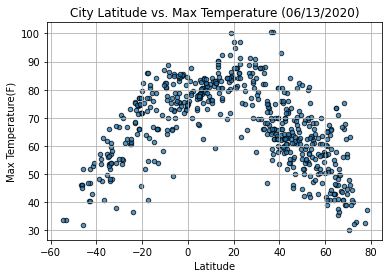

In [51]:
clean_city_data.plot("Latitude","Max Temp",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
converted_date= pd.to_datetime(clean_city_data.loc[0,"Date"],unit="s").strftime('%m/%d/%Y')
date_modified=str(converted_date).split()[0]
plt.title(f"City Latitude vs. Max Temperature ({date_modified})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Humidity Plot

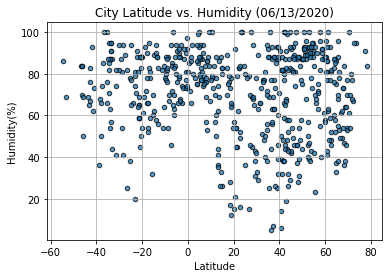

In [52]:
clean_city_data.plot("Latitude","Humidity",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f"City Latitude vs. Humidity ({date_modified})")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Cloudiness Plot

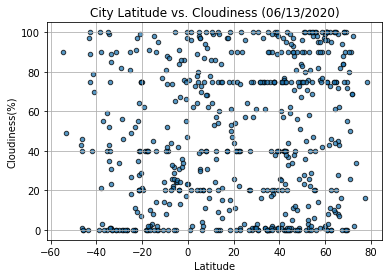

In [53]:
clean_city_data.plot("Latitude","Cloudiness",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f"City Latitude vs. Cloudiness ({date_modified})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()

## Latitude vs. Wind Speed Plot

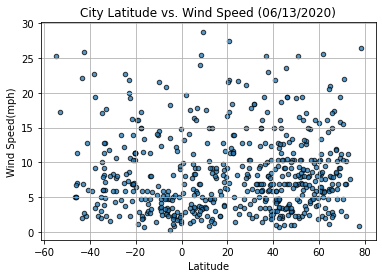

In [54]:
clean_city_data.plot("Latitude","Wind Speed",kind="scatter",marker="o", facecolor="blue", edgecolor="black", alpha= 0.75)
plt.title(f"City Latitude vs. Wind Speed ({date_modified})")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid()

## Linear Regression

In [130]:
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

In [131]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]>=0]
southern_hemisphere= clean_city_data.loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.5656241129991337


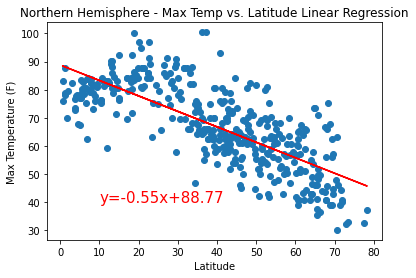

In [126]:
temp_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])
plt.plot(northern_hemisphere["Latitude"],temp_northern[0],"r-")
plt.annotate(temp_northern[1],(10,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is : {temp_northern[2]}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.6002809961028568


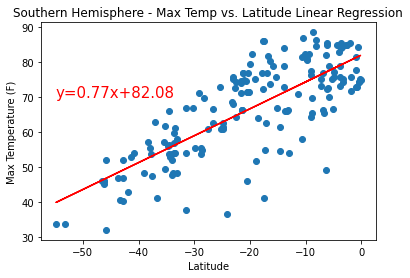

In [125]:
temp_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])
plt.plot(southern_hemisphere["Latitude"],temp_southern[0],"r-")
plt.annotate(temp_southern[1],(-55,70), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is : {temp_southern[2]}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.0006030343089558871


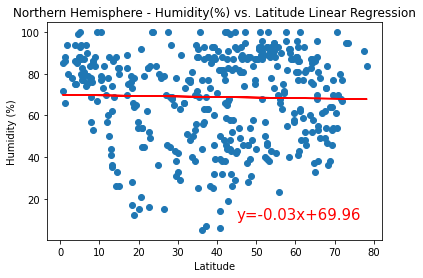

In [124]:
humidity_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])
plt.plot(northern_hemisphere["Latitude"],humidity_northern[0],"r-")
plt.annotate(humidity_northern[1],(45,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_northern[2]}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.013369612653909499


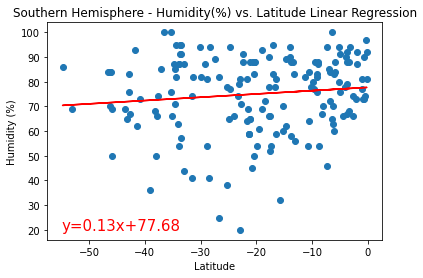

In [123]:
humidity_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])
plt.plot(southern_hemisphere["Latitude"],humidity_southern[0],"r-")
plt.annotate(humidity_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {humidity_southern[2]}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0033691419077288287


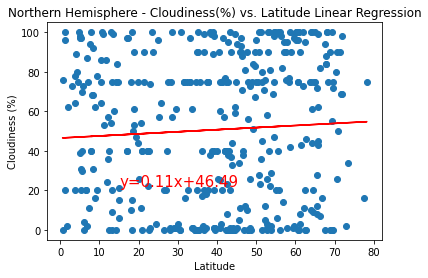

In [122]:
cloudiness_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])
plt.plot(northern_hemisphere["Latitude"],cloudiness_northern[0],"r-")
plt.annotate(cloudiness_northern[1],(15,22), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_northern[2]}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 7.635776440012626e-07


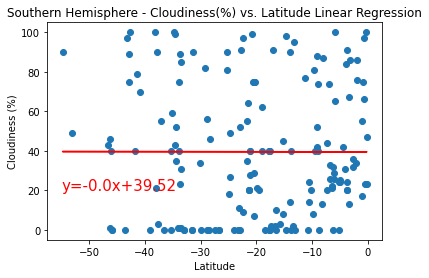

In [116]:
cloudiness_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])
plt.plot(southern_hemisphere["Latitude"],cloudiness_southern[0],"r-")
plt.annotate(cloudiness_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is : {cloudiness_southern[2]}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.001025872878053682


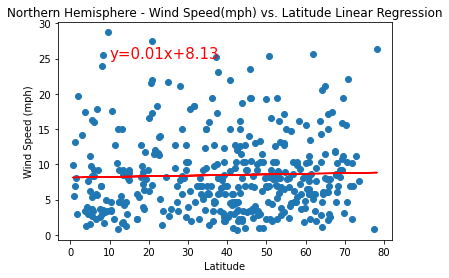

In [121]:
wind_northern= regression(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.scatter(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])
plt.plot(northern_hemisphere["Latitude"],wind_northern[0],"r-")
plt.annotate(wind_northern[1],(10,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_northern[2]}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.07042047741940843


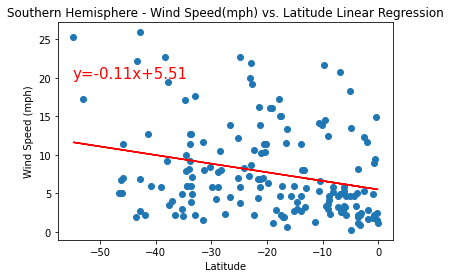

In [120]:
wind_southern= regression(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.scatter(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])
plt.plot(southern_hemisphere["Latitude"],wind_southern[0],"r-")
plt.annotate(wind_southern[1],(-55,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is : {wind_southern[2]}")
plt.show()